<a href="https://colab.research.google.com/github/settler-av/Secure-Fingerprint-Authentication-Using-Deep-Learning-and-Minutiae-Verification/blob/master/notebooks/CNN_real_fake_classification_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
print(os.getcwd())
print(os.chdir('/content/drive/Othercomputers/My Laptop/college document/SEM 5/Bisag Internship/Secure-Fingerprint-Authentication-Using-Deep-Learning-and-Minutiae-Verification'))
print(os.getcwd())

/content/drive/Othercomputers/My Laptop/college document/SEM 5/Bisag Internship/Secure-Fingerprint-Authentication-Using-Deep-Learning-and-Minutiae-Verification
None
/content/drive/Othercomputers/My Laptop/college document/SEM 5/Bisag Internship/Secure-Fingerprint-Authentication-Using-Deep-Learning-and-Minutiae-Verification


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 407 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/10
13/13 [==============================] - 168s 13s/step - loss: 1.7663 - accuracy: 0.5135 - val_loss: 0.6913 - val_accuracy: 0.6975
Epoch 2/10
13/13 [==============================] - 16s 1s/step - loss: 0.6781 - accuracy: 0.6462 - val_loss: 0.6354 - val_accuracy: 0.7200
Epoch 3/10
13/13 [==============================] - 16s 1s/step - loss: 0.5292 - accuracy: 0.7740 - val_loss: 0.5839 - val_accuracy: 0.7175
Epoch 4/10
13/13 [==============================] - 16s 1s/step - loss: 0.4433 - accuracy: 0.8133 - val_loss: 0.3595 - val_accuracy: 0.8600
Epoch 5/10
13/13 [==============================] - 16s 1s/step - loss: 0.3417 - accuracy: 0.8477 - val_loss: 0.3725 - val_accuracy: 0.8325
Epoch 6/10
13/13 [==============================] - 18s 1s/step - loss: 0.2624 - accuracy: 0.9091 - val_loss: 0.3739 - val_accuracy: 0.8350
Epoch 7/10
13/13 [==============================] - 16s 1s/step - loss: 0.25

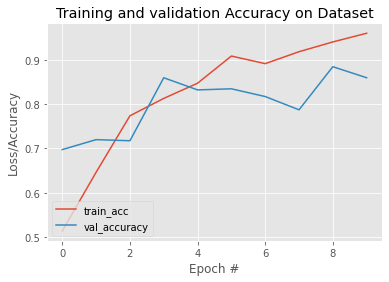

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  6 18:32:32 2022

@author: sjhan
"""
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
# root = "drive/Othercomputers/My Laptop/college document/SEM 5/Bisag Internship/Secure-Fingerprint-Authentication-Using-Deep-Learning-and-Minutiae-Verification"
train_path = 'Dataset/training/'
test_path = 'Dataset/testing/'

# data generator

train_data = ImageDataGenerator(rescale=1. / 255)
train_set = train_data.flow_from_directory(directory=train_path, target_size=(128, 128), batch_size=32,
                                           color_mode="rgb", class_mode='binary')

test_data = ImageDataGenerator(rescale=1. / 255)
test_set = train_data.flow_from_directory(directory=test_path, target_size=(128, 128), batch_size=32, color_mode="rgb",
                                          class_mode='binary')



model = Sequential()

# first layer
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flattern layer
model.add(Flatten())

# Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(train_set, validation_data=test_set, epochs=10)


plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 10), model_history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), model_history.history["val_accuracy"], label="val_accuracy")

plt.title("Training and validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# # check image
#
# test_image = image.load_img('Fake.png', target_size=(128, 128))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis=0)
# result = model.predict(test_image)
# # train_set.class_indices
# if result[0][0] == 1:
#     prediction = 'Live'
# else:
#     prediction = 'Fake'
# print(prediction)
